In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("RTA Dataset.csv")

In [ ]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
data.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,12077,...,12316.000000,12316.000000,12008,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,14,...,NaN,NaN,13,4,3,6,4,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Other,...,NaN,NaN,Going straight,Driver or rider,Male,na,3,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,3819,...,NaN,NaN,8158,4944,5253,4443,7076,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(12316, 28)

In [ ]:
data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
data.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [ ]:

categorical=[i for i in data.columns if data[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [ ]:
for i in categorical:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [ ]:
data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

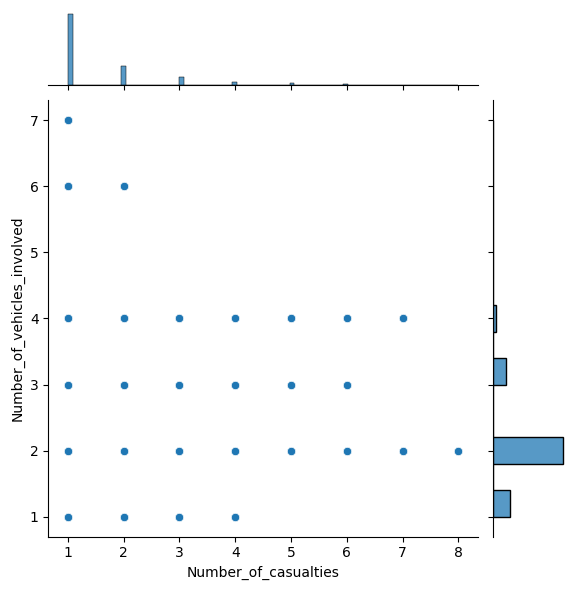

In [ ]:
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=data)

In [ ]:
data.corr()


<ipython-input-39-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


In [ ]:
numerical=[i for i in data.columns if data[i].dtype!='O']
print('The numerical variables are',numerical)

The numerical variables are ['Number_of_vehicles_involved', 'Number_of_casualties']


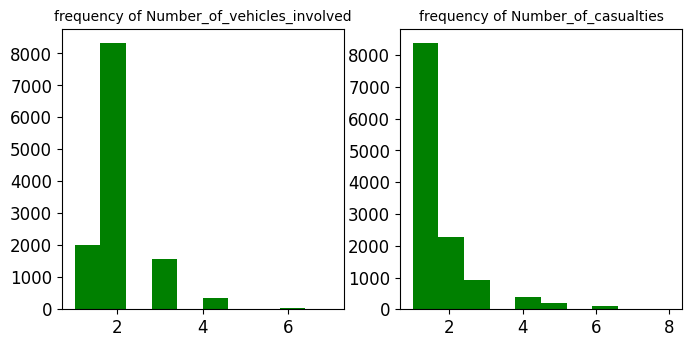

In [ ]:
plt.figure(figsize=(8,8))
plotnumber = 1
for i in numerical:
    if plotnumber <= data.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(data[i],color='green')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

Text(0.5, 1.0, 'Road Surface Type Distribution')

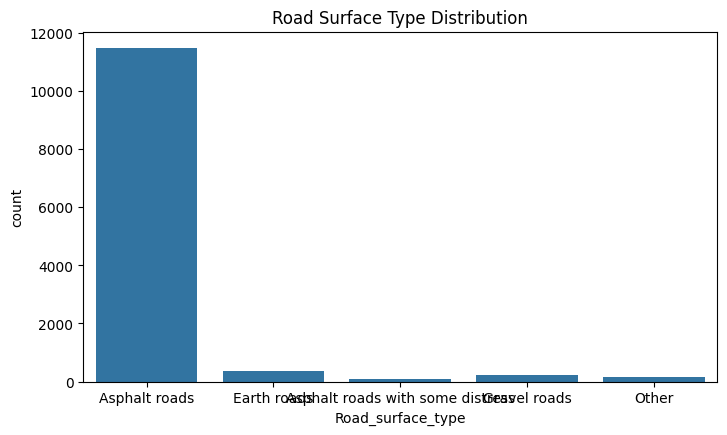

In [ ]:
plt.figure(figsize=(18, 10))

# Plotting road conditions distribution
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Road_surface_type')
plt.title('Road Surface Type Distribution')

Text(0.5, 1.0, 'Weather Conditions Distribution')

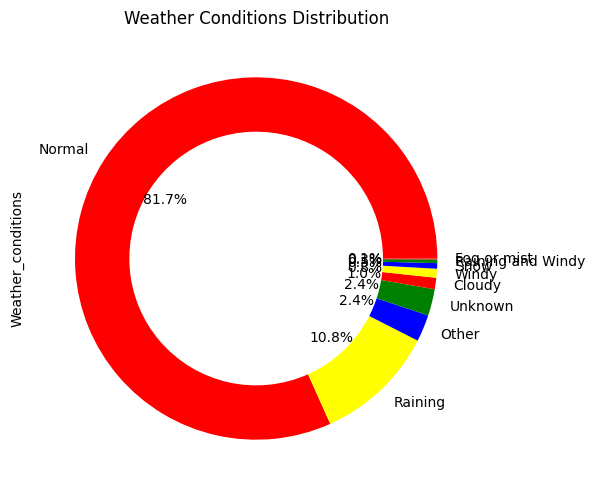

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 2)
data['Weather_conditions'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'yellow', 'blue', 'green'], wedgeprops=dict(width=0.3))
plt.title('Weather Conditions Distribution')

<ipython-input-54-623d5c7edbca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data , x='Light_conditions', palette=custom_palette)
<ipython-input-54-623d5c7edbca>:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=data , x='Light_conditions', palette=custom_palette)


Text(0.5, 1.0, 'Light Conditions Distribution')

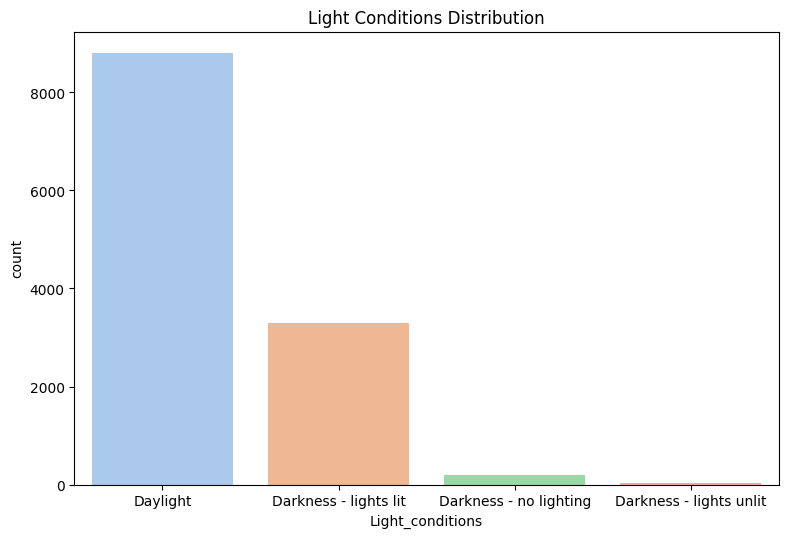

In [ ]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 3)
sns.countplot(data=data , x='Light_conditions', palette=custom_palette)
plt.title('Light Conditions Distribution')

Text(0.5, 1.0, 'Accident Severity by Road Surface Type')

<Figure size 1000x1000 with 0 Axes>

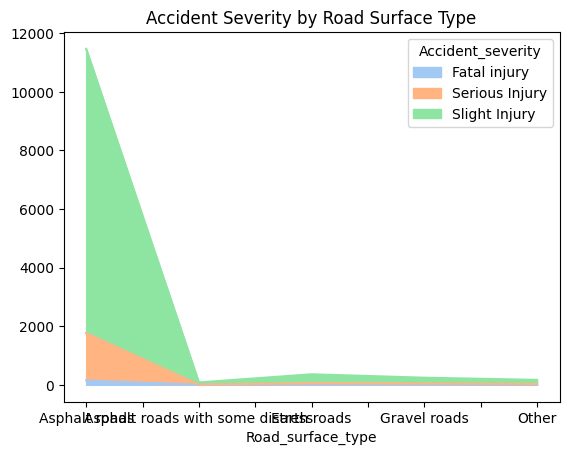

In [ ]:
plt.figure(figsize=(10, 10))
pd.crosstab(data['Road_surface_type'], data['Accident_severity']).plot(kind='area', stacked=True, color=custom_palette)
plt.title('Accident Severity by Road Surface Type')

<ipython-input-62-26fa24970f7d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

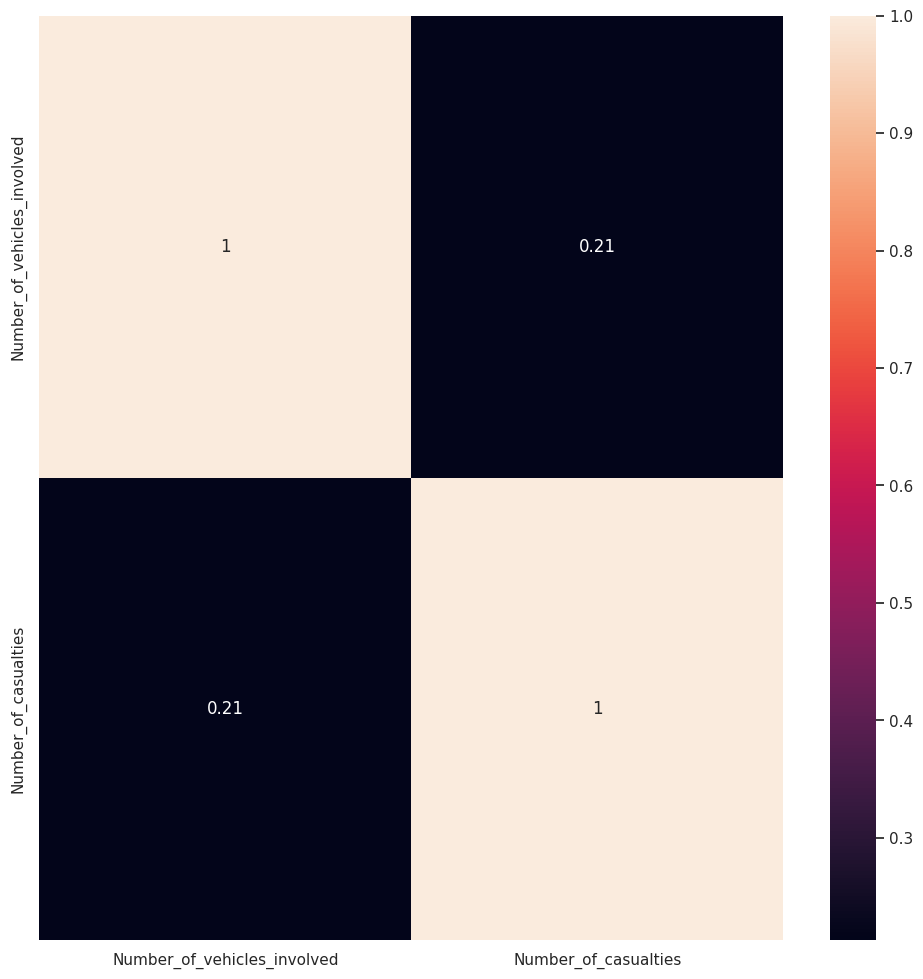

In [ ]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(data.corr(), annot=True)
